In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
file_path = '/content/medical insurance.zip'

df = pd.read_csv(file_path)
print("Dataset loaded successfully.")
display(df.head())


Dataset loaded successfully.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Reasoning**:
Check for missing values in each column and print the counts.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:

print("Descriptive Statistics for Numerical Columns:")
display(df.describe())

Descriptive Statistics for Numerical Columns:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
numerical_cols=df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


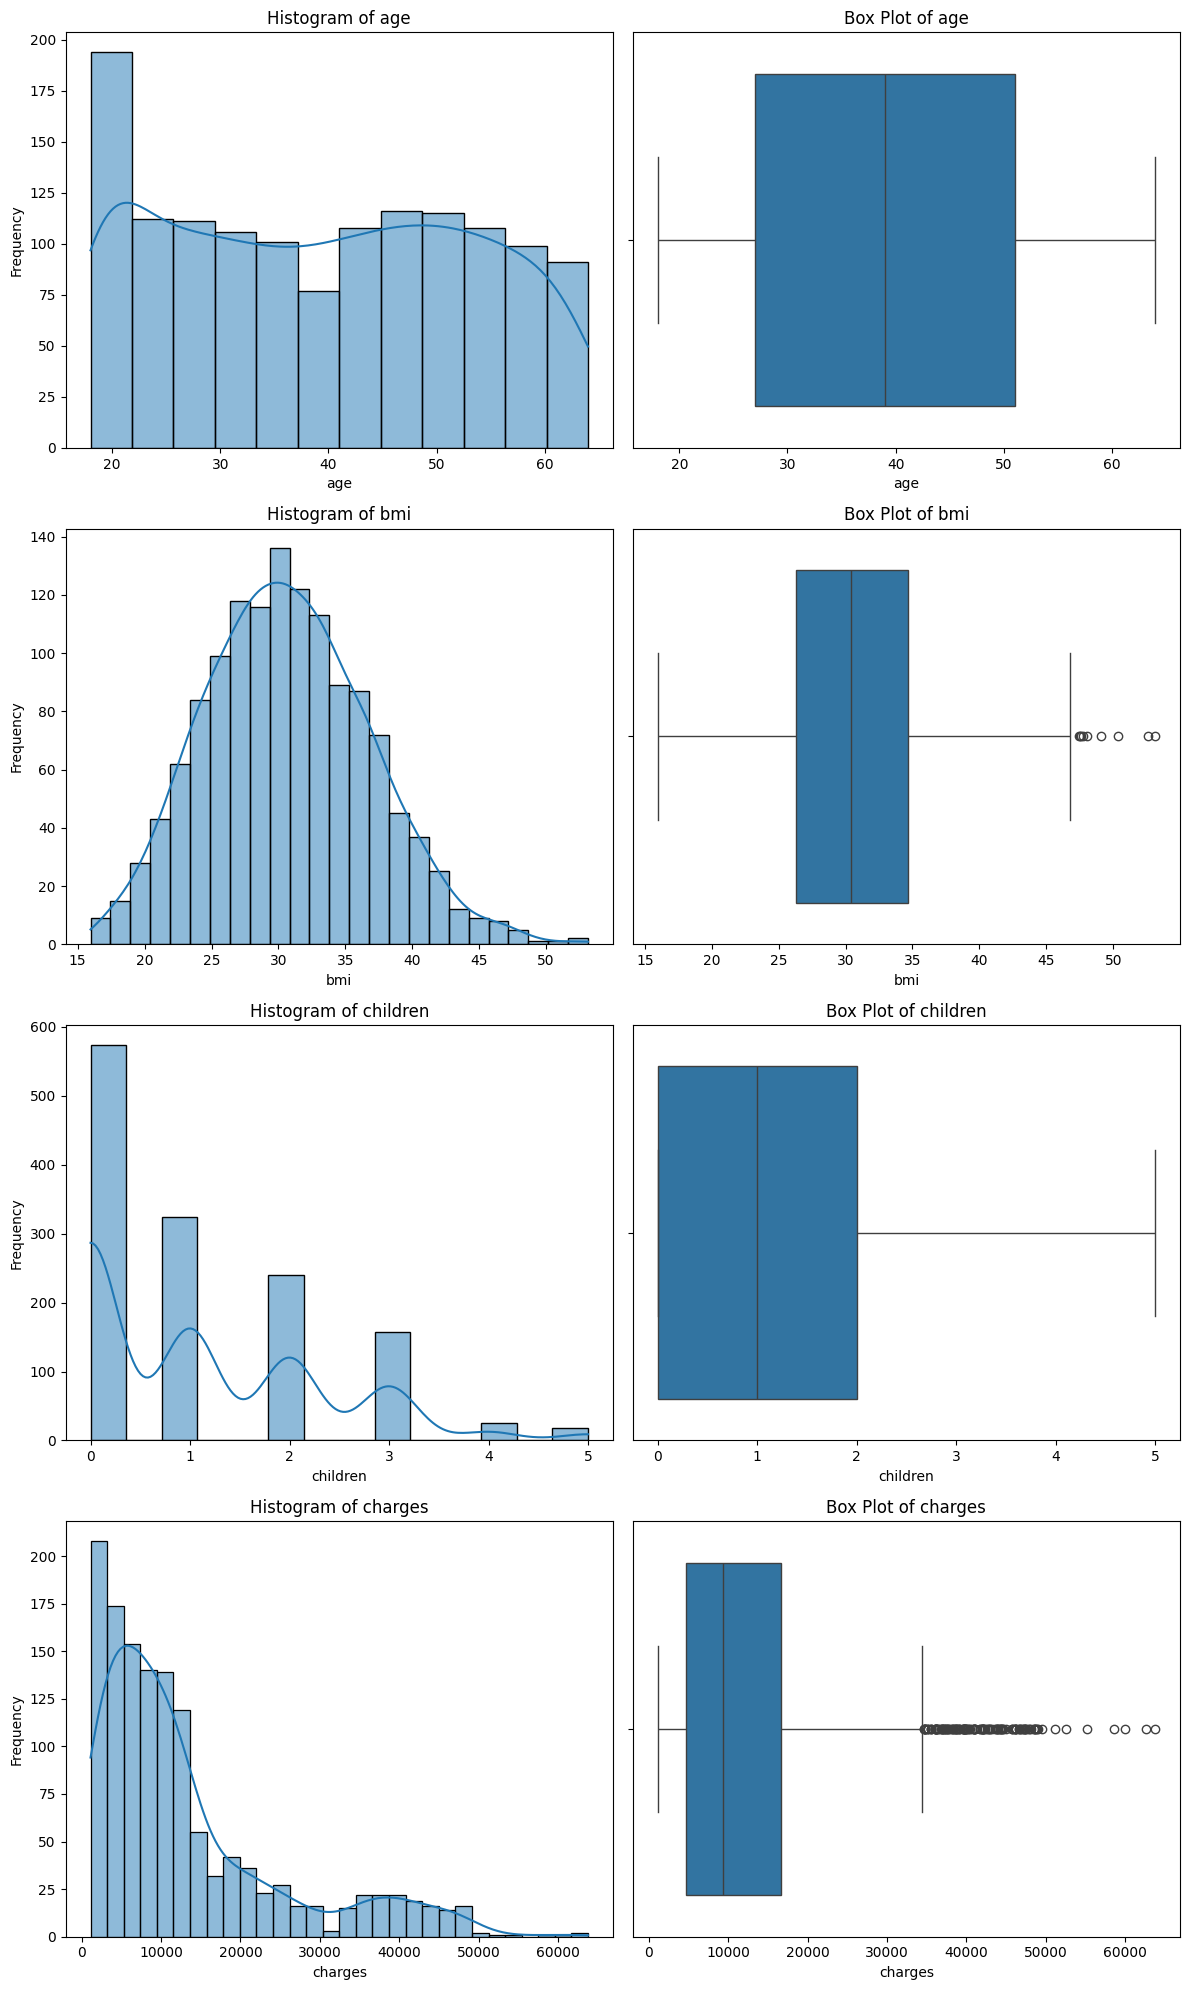

In [ ]:
n_cols=len(numerical_cols)
fig,axes=plt.subplots(nrows=n_cols,ncols=2,figsize=(12,5*n_cols))

for i, col in enumerate(numerical_cols):
  sns.histplot(df[col],kde=True,ax=axes[i,0])
  axes[i, 0].set_title(f'Histogram of {col}')
  axes[i, 0].set_xlabel(col)
  axes[i, 0].set_ylabel('Frequency')

  sns.boxplot(x=df[col], ax=axes[i, 1])
  axes[i, 1].set_title(f'Box Plot of {col}')
  axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')

Frequency Table for sex:


,count
sex,
male,676
female,662


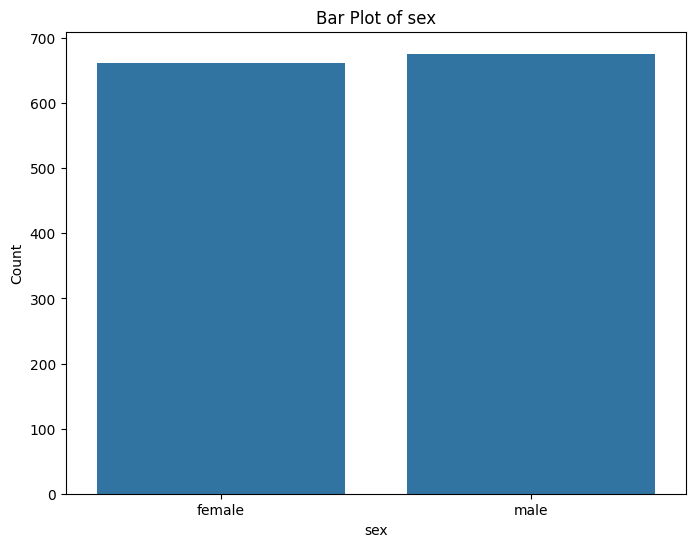


Frequency Table for smoker:


,count
smoker,
no,1064
yes,274


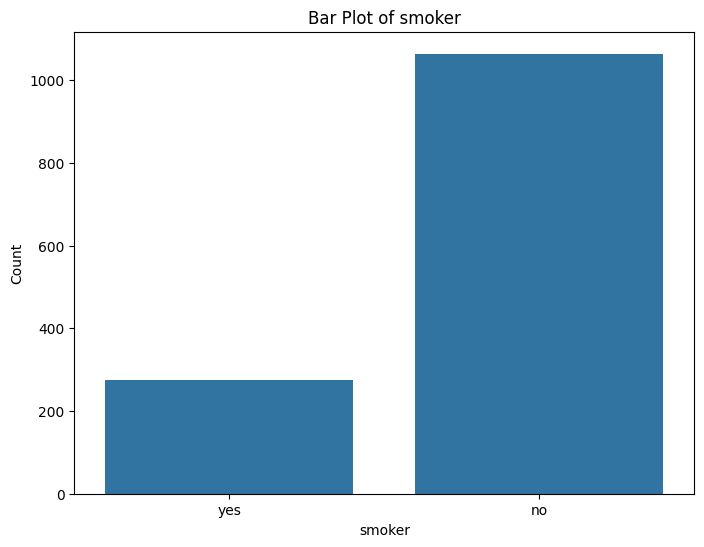


Frequency Table for region:


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


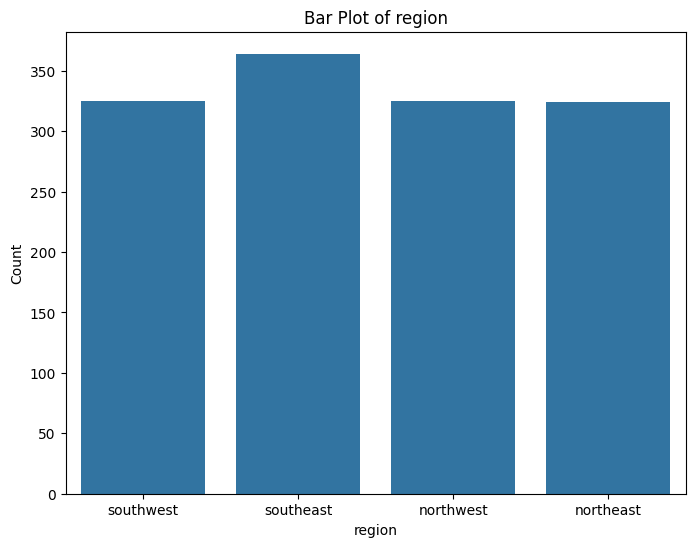

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    print(f"\nFrequency Table for {col}:")
    display(df[col].value_counts())

    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Correlation Matrix for Numerical Features:


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


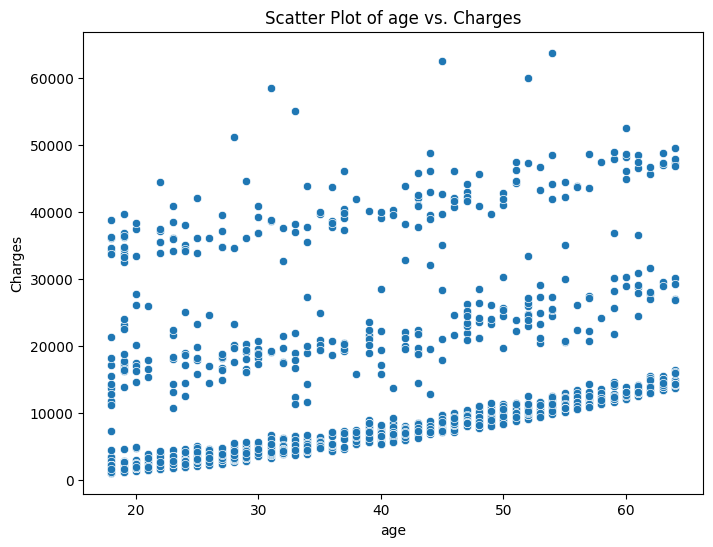

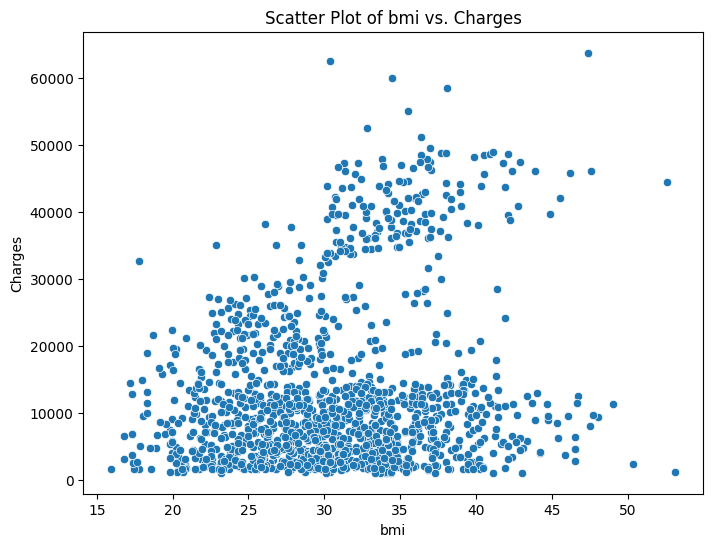

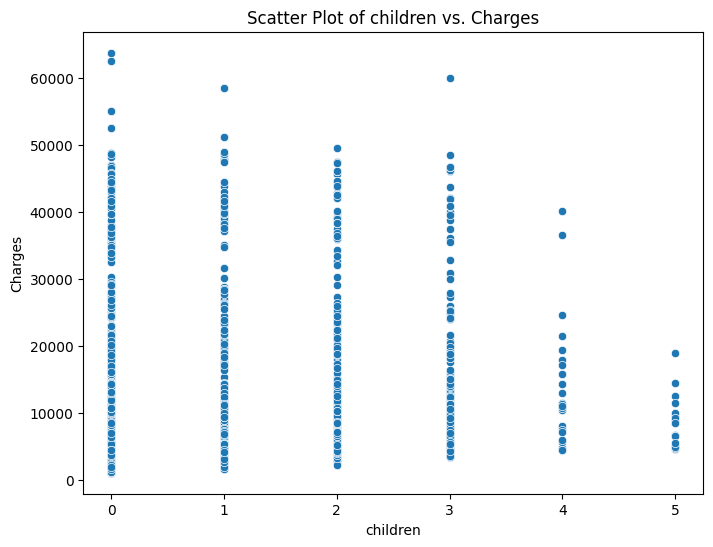

In [ ]:
# Relationships between numerical features and charges
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('charges') # Remove target variable for feature-feature correlation

print("Correlation Matrix for Numerical Features:")
display(df[numerical_cols + ['charges']].corr())

# Scatter plots for numerical features vs. charges
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='charges', data=df)
    plt.title(f'Scatter Plot of {col} vs. Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()


Average charges by sex:


,charges
sex,
female,12569.578844
male,13956.751178


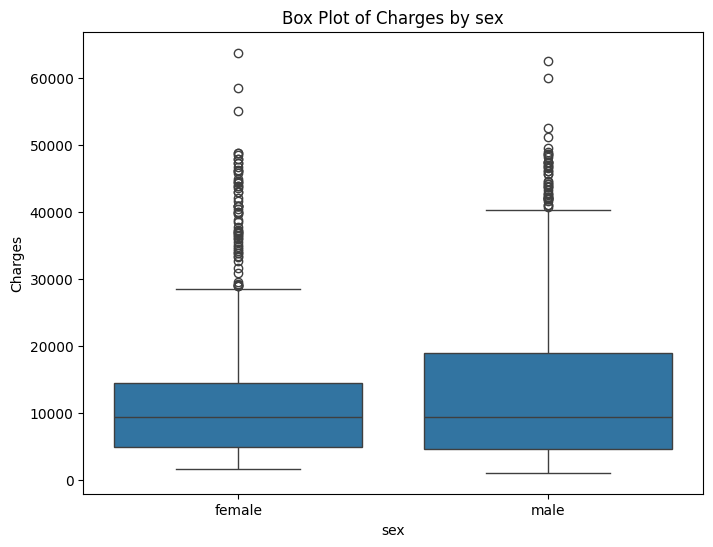


Average charges by smoker:


,charges
smoker,
no,8434.268298
yes,32050.231832


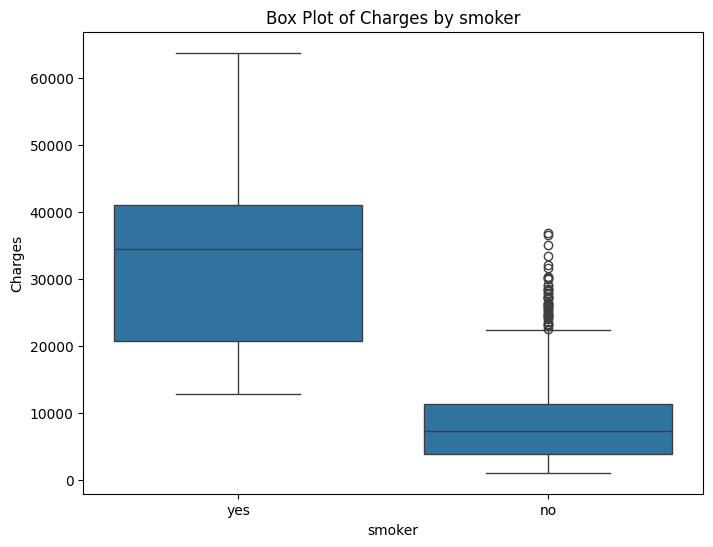


Average charges by region:


,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


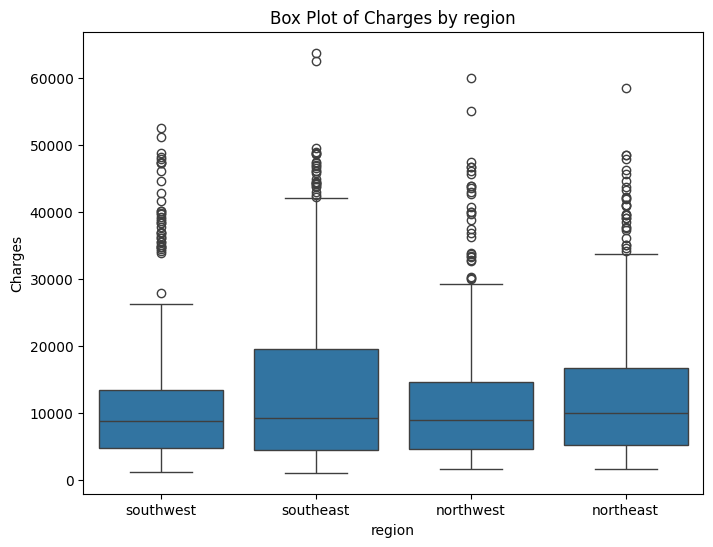

In [ ]:
# Relationships between categorical features and charges
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nAverage charges by {col}:")
    display(df.groupby(col)['charges'].mean())

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Box Plot of Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

## Feature Engineering

### Subtask:
Create new features or transform existing ones based on the insights gained from EDA.

**Reasoning**:
Based on the EDA results, we can perform feature engineering to potentially improve the performance of our model. This may involve creating interaction terms, polynomial features, or transforming variables to address skewness or non-linearity.

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for 'age' and 'bmi'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_encoded[['age', 'bmi']])
poly_feature_names = poly.get_feature_names_out(['age', 'bmi'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_encoded.index)

# Concatenate polynomial features with the existing dataframe
df_engineered = pd.concat([df_encoded, df_poly], axis=1)

display(df_engineered.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,age^2,age bmi,bmi^2
0,19,27.900,0,16884.92400,False,True,False,False,True,19.0,27.900,361.0,530.100,778.410000
1,18,33.770,1,1725.55230,True,False,False,True,False,18.0,33.770,324.0,607.860,1140.412900
2,28,33.000,3,4449.46200,True,False,False,True,False,28.0,33.000,784.0,924.000,1089.000000
3,33,22.705,0,21984.47061,True,False,True,False,False,33.0,22.705,1089.0,749.265,515.517025
4,32,28.880,0,3866.85520,True,False,True,False,False,32.0,28.880,1024.0,924.160,834.054400


## Prepare data for modeling

### Subtask:
Encode categorical variables and split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_engineered.drop('charges', axis=1)
y = df_engineered['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Data split into training and testing sets.
Training set shape (X_train, y_train): (1070, 13) (1070,)
Testing set shape (X_test, y_test): (268, 13) (268,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

print("Selected model: Linear Regression")

Selected model: Linear Regression


In [ ]:
# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Predictions made on the testing data.")

Predictions made on the testing data.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 34015746.00
R-squared (R2): 0.78
